# Projeto de Análise de Desigualdade em Saúde no modelo HEAT/OMS
## Bloco 2025/1 = análise do sistema de mortalidade do SUS com agregação por unidades federativas




#### Aspectos gerais e participantes

Projeto Desenvolvido em parceria da MS/SECTICS/DESID com a Organização Mundial de Saúde

Elaborado em linguagem Python, utilizando a biblioteca pysus para acesso ao SIM (Sistema de Informações de Mortalidade do SUS)

Coordenador-geral:

Coordenadores: 

Cientista de dados: Marcos Mesquita

Outros participantes:

Data: 06/12/2024


#### Objetivos

O principal objetivo desse projeto é realizar a avaliação de desigualdade na saúde no Brasil com ênfase para a dimensão de unidades subnacionais, estados e municípios brasileiros, a partir da aplicação do modelo do HEAT, tendo como objetivos específicos:

- Apresentar indicadores de saúde no Brasil desagregados por subunidades nacionais em uma visualização interativa a partir do modelo do HEAT Plus;
- Oferecer um repositório comum e atualizado com dados de desigualdade da saúde no Brasil desagregados por estados e municípios em um modelo sob reconhecimento internacional;
- Permitir exploração e acesso dos dados e da metodologia para outros tipos de análises.

# Etapa 1 - Definição do Bloco

O projeto ocorrerá em blocos sucessivos, nos quais serão definidos o problema e os indicadores a serem analisados.

### Definição do problema do bloco



 H0 - as unidades federativa são variáveis determinantes para mortalidade no país

### Escopo do Bloco 1


* indicador: mortalidade (número de mortes por população, dados de morte do SIM/SUS e dados populacionais pelo Censos de 2010 e 2022)
* localização: todo o Brasil, com agregação de mortalidade por Estados e Municípios
* período: 2010 e 2022 
* doenças: “doenças evitáveis” conforme definido pelo OCDE
* outros critérios de filtro: até 74 anos de idade (em razão da aplicação do critério de "doenças evitáveis")

# Etapa 2 - Análise primária dos dados por bloco

## Aspectos teóricos e técnicos das fontes


#### Aspectos técnicos - ambiente, linguagem e ferramentas principais

A análise será feita utilizando a linguagem Python e a biblioteca Pysus que permite acesso às principais bases do SUS de forma direta.
O Pysus exige um ambiente linux para execução de alguns comandos o que foi possível, mesmo em uma máquina Windows, a partir do WSL do Windows.
Foi criado um ambiente em WSL e o conjunto da extração, tratamento e análise dos dados foi realizado no formato Notebook em um editor VSCode, dentro de um Dev Container: Default Linux Universal.


#### Morte e mortalidade no HEAT

Para entendermos como o HEAT trata a mortalidade, fizemos uma busca de indicadores de mortalidade no WHO Health Inequality Data Repository.

O repositório traz dados e metadados de todos os indicadores utilizados pelo HEAT.
Apresenta um total de 3915 indicadores, distribuídos entre 14 seções.

Foi feita uma revisão geral dos indicadores relacionados à mortalidade, que depois foi refinada pela busca das seguintes palavras : “death”, “mortality”, “fatal”, ‘fatality” ,“Probability of dying”, “suicide”. E foram encontrados 388 indicadores que trazem uma destas expressões na sua descrição.


#### SIM (Sistema de Informações de Mortalidade do SUS)

A mortalidade e os indicadores de morte serão buscados no SIM (Sistema de Informações de Mortalidade do SUS).
O SIM disponibiliza dados de mortes no Brasil desde 1996 por ocorrências, gerido pelo Departamento de Análise de Situação de Saúde, da Secretaria de Vigilância em Saúde do Ministério da Saúde, em conjunto com as Secretarias Estaduais e Municipais de Saúde. Estas últimas responsáveis efetivamente pela coleta dos dados.

O SIM traz informações do indivíduo, como sexo, idade, localidade e causas da morte, classificadas de acordo com o CID (Classificação Internacional de Doenças e Problemas Relacionadas à Saúde).


#### CID (Classificação Internacional de Doenças e Problemas Relacionadas à Saúde)

Com o intuito de padronizar a nomenclatura de patologias e com abrangência para todo o mundo, foi elaborado pela Organização Mundial da Saúde (OMS) uma  classificação internacional de doenças, a CID (Classificação Internacional de Doenças e Problemas Relacionadas à Saúde). 

A Classificação é atualizada periodicamente. A versão mais atual é a CID11, publicada em janeiro de 2022.

No entanto, por se tratar de revisão que traz impactos nos registros e que exige considerável atualização das ferramentas de captura das informações, o SIM utiliza versões anteriores da CID.
- CID9 - dados até 1995
- CID10 - a partir de 1996 até a data atual

Em razão do recorte temporal dos dados, de 1998 a 2022, iremos utilizar somente a CID10.
A CID10 é organizada em 22 capítulos e possui, além da classificação de doenças, descrição de códigos que permitem identificar sinais, sintomas, queixas, causas externas e circunstâncias sociais.


#### CID de doenças evitáveis

Como elemento do escopo deste trabalho iremos tratar de doenças evitáveis.

O Brasil, a partir da Secretaria de Vigilância em Saúde apresenta uma classificação de doenças evitáveis. 

Lista de causas evitáveis pode ser encontrada nos links: http://tabnet.datasus.gov.br/cgi/sim/Obitos_Evitaveis_0_a_4_anos.pdf




#### População (Censo)


Os dados de população são os do Censo, acessados pelo site do IBGE, https://sidra.ibge.gov.br/Tabela/9606






### Instalação e importação de bibliotecas

#### Instalação de bibliotecas

In [7]:
# # Costuma ser exigida a instalação destas bibliotecas no primeiro acesso ao Pysus
# !apt-get update  
# !apt-get install libffi-dev  # Install libffi-dev
# !pip install --upgrade pip  # Ensure pip is up to date
# !pip install pysus # Exa
# !pip install gdown
!pip install pylance

#### Importação de bibliotecas

In [1]:
# importar biblioteca básica para manipulação de dados
import pandas as pd
import numpy
import os
import sidrapy
import requests # para carga de endereços web - api
import gdown



In [9]:
# importar bibliotecas para carga dos dados
import pysus
import pylance

from pysus import SIM
from pysus.online_data.SIM import download
from pysus.preprocessing.decoders import translate_variables_SIM
from pysus.preprocessing.SIM import group_and_count, redistribute_missing, redistribute_cid_chapter
from pysus.online_data.SIM import get_CID9_table, get_CID10_table, get_municipios, get_ocupations
from ftplib import FTP
from pathlib import Path  

ModuleNotFoundError: No module named 'pylance'

#### Diretórios - configuração

In [83]:
# Definir diretório padrão para pysus
pysus.online_data.SIM.CACHEPATH="./downloads_sim_original"
# Definir pasta para download de arquivos csv e parquet
import os 

# Define diretório para armazenar arquivos do sim (carregados por pysus) quando o SIM.CACHEPATH não funcionar
os.makedirs('downloads_sim_original', exist_ok=True)  
downloads_sim = "downloads_sim_original"

# Define diretório para armazenar outros arquivos
os.makedirs('downloads_outros', exist_ok=True)  

# Define diretório para armazenar arquivos trabalhados
os.makedirs('files_clean', exist_ok=True)  

#### Acesso ao SIM

In [84]:
sim = SIM().load() # Loads the files from DATASUS

In [87]:
sim.paths

(/dissemin/publicos/SIM/CID10/DORES, /dissemin/publicos/SIM/CID9/DORES)

## Coleta e estruturação dos dados

### Carga de dados SIM

#### Carga SIM principal

In [99]:
# Carrega os dados do SIM
# Definição de variáveis
grupo = "CID10" # Agrupamento por CID10
uf = "BR" # A sigla BR carrega dados de todos as unidades federativas
ano = [2010] # Anos do escopo, 2010 e 2022
local = downloads_sim # Local para armazenar os arquivos, definido nas etapas anteriores

dobr = download(grupo,uf,ano,local) # Carrega os dados do SIM
#dobr2010 = download("cid10","br",2022,downloads_sim)
dobr2010 

DOBR2022.parquet: 100%|██████████| 3.78M/3.78M [01:22<00:00, 45.6kB/s]


downloads_sim_original/DOBR2022.parquet

#### Carga SIM auxiliar

O SIM traz algumas tabelas auxiliares de CID10 e municípios. Trazemos estas informações para algum tipo de batimento, mas para estas informações iremos utilizar fontes externas.

In [10]:
# Download de tabela auxiliar de CID10
cid10 = get_CID10_table()
cid10.head()

2024-12-26 13:54:33.967 | DEBUG    | pysus.online_data.SIM:get_CID10_table:116 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2024-12-26 13:54:33.997 | DEBUG    | pysus.online_data.SIM:get_CID10_table:120 - Changing FTP work dir to: /dissemin/publicos/SIM/CID10/TABELAS
2024-12-26 13:54:34.602 | INFO     | pysus.online_data.SIM:get_CID10_table:146 - Data stored as parquet at ./downloads_sim_original/SIM_CID10_.parquet
2024-12-26 13:54:34.603 | DEBUG    | pysus.online_data.SIM:get_CID10_table:149 - CID10.DBF removed


ModuleNotFoundError: No module named 'numpy.rec'

ModuleNotFoundError: No module named 'numpy.rec'

In [11]:
# Download de tabela auxiliar de CID10
munic = get_municipios()
print(munic.head())

2024-12-26 13:55:15.591 | DEBUG    | pysus.online_data.SIM:get_municipios:208 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2024-12-26 13:55:15.623 | DEBUG    | pysus.online_data.SIM:get_municipios:212 - Changing FTP work dir to: /dissemin/publicos/SIM/CID10/TABELAS
2024-12-26 13:55:16.535 | INFO     | pysus.online_data.SIM:get_municipios:238 - Data stored as parquet at ./downloads_sim_original/SIM_CADMUN_.parquet
2024-12-26 13:55:16.536 | DEBUG    | pysus.online_data.SIM:get_municipios:241 - CADMUN.DBF removed


ModuleNotFoundError: No module named 'numpy.rec'

### Carga externa ao SIM

Iremos carregar informações de fontes externas.



##### CIDs doenças evitáveis - SVS

In [14]:
# Download de tabela tratada de CIDs evitáveis de acordo com documentos da SVS

url = 'https://docs.google.com/spreadsheets/d/1YWurDqnBDMz4ACOEctY9uuQkEm7uSRAogzZETQrLCXk/edit?usp=drive_link'
# Convert the Google Sheets URL to a CSV export URL
csv_url = url.replace('/edit?usp=drive_link', '/export?format=csv')

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(csv_url)

# Now you can work with the DataFrame 'df'
df.head()


,CID10_EVIT,CID10_EVIT_CLASS,cid10_evit_nome,cid10_evit_atributo,cid10_evit_cod_pai
0,Causas Evitáveis,Reduzíveis pelas ações de imunoprevenção,Tuberculose do sistema nervoso,(A17),A17
1,Causas Evitáveis,Reduzíveis pelas ações de imunoprevenção,Tuberculose miliar,(A19),A19
2,Causas Evitáveis,Reduzíveis pelas ações de imunoprevenção,Tétano obstétrico,(A34),A34
3,Causas Evitáveis,Reduzíveis pelas ações de imunoprevenção,Outros tipos de tétano,(A35),A35
4,Causas Evitáveis,Reduzíveis pelas ações de imunoprevenção,Difteria,(A36),A36


In [6]:
# Salvar arquivo csv
df.to_csv('downloads_outros/cid10_evit_svs.csv', index=False)

In [135]:
cid_evit_ocde = pd.read_csv('downloads_outros/cid10_evit_svs.csv')
cid_evit_ocde.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CID10_EVIT           322 non-null    object
 1   CID10_EVIT_CLASS     321 non-null    object
 2   cid10_evit_nome      321 non-null    object
 3   cid10_evit_atributo  321 non-null    object
 4   cid10_evit_cod_pai   321 non-null    object
dtypes: object(5)
memory usage: 15.4+ KB


##### CIDs doenças evitáveis - OCDE

In [129]:
# Download de tabela tratada de CIDs evitáveis de acordo com documentos da OCDE
url = 'https://docs.google.com/spreadsheets/d/1X8AH0zs4PNc_bUpZ3tBvFw2HGpgb9CjShOkwXQ0so_I/edit?usp=sharing'
# Convert the Google Sheets URL to a CSV export URL
csv_url = url.replace('/edit?usp=sharing', '/export?format=csv')

# Read the CSV data into a pandas DataFrame
ocde_evit = pd.read_csv(csv_url)

# Now you can work with the DataFrame 'df'
ocde_evit.head()

,avoid_flag,prevent_flag,treat_flag,Group,Causes of deaths,Rationale for inclusion,Range,cid_pai
0,Avoidable mortality,Preventable mortality,NaN,Infectious diseases,Intestinal diseases,Most of these infections can be prevented thro...,(A00-A09),A0
1,Avoidable mortality,Preventable mortality,NaN,Infectious diseases,"Diphtheria, Tetanus, Poliomyelitis",Most of these infections can be prevented thro...,"(A35, A36, A80)",A35
2,Avoidable mortality,Preventable mortality,NaN,Infectious diseases,"Diphtheria, Tetanus, Poliomyelitis",Most of these infections can be prevented thro...,"(A35, A36, A80)",A36
3,Avoidable mortality,Preventable mortality,NaN,Infectious diseases,"Diphtheria, Tetanus, Poliomyelitis",Most of these infections can be prevented thro...,"(A35, A36, A80)",A80
4,Avoidable mortality,Preventable mortality,NaN,Infectious diseases,Whooping cough,Most of these infections can be prevented thro...,(A37),A37


In [136]:
ocde_evit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   avoid_flag               346 non-null    object
 1   prevent_flag             189 non-null    object
 2   treat_flag               184 non-null    object
 3   Group                    346 non-null    object
 4   Causes of deaths         346 non-null    object
 5   Rationale for inclusion  346 non-null    object
 6   Range                    346 non-null    object
 7   cid_pai                  346 non-null    object
dtypes: object(8)
memory usage: 21.8+ KB


In [18]:
# Salvar arquivo csv
ocde_evit.to_csv('downloads_outros/cid10_evit_ocde.csv', index=False)

##### População Censo 

In [26]:
# Os dados populacionais são os dos Censos de 2010 e 2022
# Coletamos variáveis de sexo, raça e faixa etária, o que não excedeu os limites do uso do API do SIDRA, então iremos carregar o download feito a posteriori

# ID do arquivo no Google Drive
file_id = '1ohplLORDk_TaAQNQwW7TUjZ10OLxiA2f'

# Baixa o arquivo para o ambiente de execução do Colab
output_file = 'downloaded_file.csv' 
gdown.download(id=file_id, output=output_file, quiet=False)

# Lê o arquivo CSV usando o pandas, pulando as 4 primeiras linhas
censo_pop = pd.read_csv(output_file, skiprows=3)

Downloading...
From: https://drive.google.com/uc?id=1ohplLORDk_TaAQNQwW7TUjZ10OLxiA2f
To: /workspaces/heat_br_bloco1/downloaded_file.csv
100%|██████████| 11.0M/11.0M [00:00<00:00, 19.0MB/s]
/tmp/ipykernel_3561/3438096824.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  censo_pop = pd.read_csv(output_file, skiprows=3)


In [27]:
censo_pop.head()


,Ano,Nível,Cód.,Município,Cor ou raça,Sexo,Total,0 a 4 anos,75 a 79 anos,80 a 84 anos,85 a 89 anos,90 a 94 anos,95 a 99 anos,100 anos ou mais
0,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Branca,Homens,5311,430,63,33,11,2,-,-
1,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Branca,Mulheres,5038,446,62,26,14,2,2,-
2,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Preta,Homens,693,23,9,7,2,1,1,-
3,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Preta,Mulheres,466,21,4,3,1,-,-,-
4,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Amarela,Homens,96,4,2,-,-,-,-,-


In [28]:
# Salvar arquivo de população do Censo
censo_pop.to_csv('downloads_outros/censo_pop.csv')

## Tratamento de Dados

#### Tratamento de População Censo

In [14]:
# Carga de arquivo de População do Censo
censo_pop = pd.read_csv('downloads_outros/censo_pop.csv')

/tmp/ipykernel_2461/3371380752.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  censo_pop = pd.read_csv('downloads_outros/censo_pop.csv')


In [15]:
censo_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111420 entries, 0 to 111419
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        111420 non-null  int64  
 1   Ano               111419 non-null  object 
 2   Nível             111407 non-null  object 
 3   Cód.              111400 non-null  float64
 4   Município         111400 non-null  object 
 5   Cor ou raça       111400 non-null  object 
 6   Sexo              111400 non-null  object 
 7   Total             111400 non-null  object 
 8   0 a 4 anos        111400 non-null  object 
 9   75 a 79 anos      111400 non-null  object 
 10  80 a 84 anos      111400 non-null  object 
 11  85 a 89 anos      111400 non-null  object 
 12  90 a 94 anos      111400 non-null  object 
 13  95 a 99 anos      111400 non-null  object 
 14  100 anos ou mais  111400 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 12.8+ MB


In [17]:
# Excluir registros de mun_cod null
censo_pop = censo_pop[censo_pop['Município'].notnull()]
censo_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111400 entries, 0 to 111399
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        111400 non-null  int64  
 1   Ano               111400 non-null  object 
 2   Nível             111400 non-null  object 
 3   Cód.              111400 non-null  float64
 4   Município         111400 non-null  object 
 5   Cor ou raça       111400 non-null  object 
 6   Sexo              111400 non-null  object 
 7   Total             111400 non-null  object 
 8   0 a 4 anos        111400 non-null  object 
 9   75 a 79 anos      111400 non-null  object 
 10  80 a 84 anos      111400 non-null  object 
 11  85 a 89 anos      111400 non-null  object 
 12  90 a 94 anos      111400 non-null  object 
 13  95 a 99 anos      111400 non-null  object 
 14  100 anos ou mais  111400 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 13.6+ MB


In [18]:
censo_pop.columns

Index(['Unnamed: 0', 'Ano', 'Nível', 'Cód.', 'Município', 'Cor ou raça',
       'Sexo', 'Total', '0 a 4 anos', '75 a 79 anos', '80 a 84 anos',
       '85 a 89 anos', '90 a 94 anos', '95 a 99 anos', '100 anos ou mais'],
      dtype='object')

In [19]:
# Colunas para transformar em inteiro
cols_age = ['Total','0 a 4 anos', '75 a 79 anos', '80 a 84 anos', '85 a 89 anos','90 a 94 anos', '95 a 99 anos', '100 anos ou mais']
# para todas as colunas identificar substituir '-' por 0
censo_pop_clean01 = censo_pop.copy()
censo_pop_clean01[cols_age] = censo_pop_clean01[cols_age].replace('-',0)

# transformar todas as colunas definidas para formato integer
censo_pop_clean01[cols_age] = censo_pop_clean01[cols_age].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
censo_pop_clean01.info()


<class 'pandas.core.frame.DataFrame'>
Index: 111400 entries, 0 to 111399
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        111400 non-null  int64  
 1   Ano               111400 non-null  object 
 2   Nível             111400 non-null  object 
 3   Cód.              111400 non-null  float64
 4   Município         111400 non-null  object 
 5   Cor ou raça       111400 non-null  object 
 6   Sexo              111400 non-null  object 
 7   Total             111400 non-null  int64  
 8   0 a 4 anos        111400 non-null  int64  
 9   75 a 79 anos      111400 non-null  int64  
 10  80 a 84 anos      111400 non-null  int64  
 11  85 a 89 anos      111400 non-null  int64  
 12  90 a 94 anos      111400 non-null  int64  
 13  95 a 99 anos      111400 non-null  int64  
 14  100 anos ou mais  111400 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 13.6+ MB


In [20]:
# Gerar coluna de população total até 74 anos
cols_age_over75 = ['75 a 79 anos', '80 a 84 anos', '85 a 89 anos','90 a 94 anos', '95 a 99 anos', '100 anos ou mais']

censo_pop_clean02 = censo_pop_clean01.copy()

# Subtrair a população de 75 anos ou mais da população total
censo_pop_clean02['pop_under74'] = censo_pop_clean02['Total'] - censo_pop_clean02[cols_age_over75].sum(axis=1)

# Excluir colunar cols_age_over75 e 0 a 4 anos
censo_pop_clean02.drop(columns=cols_age_over75, inplace=True)

censo_pop_clean02.head()


,Unnamed: 0,Ano,Nível,Cód.,Município,Cor ou raça,Sexo,Total,0 a 4 anos,pop_under74
0,0,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Branca,Homens,5311,430,5202
1,1,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Branca,Mulheres,5038,446,4932
2,2,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Preta,Homens,693,23,673
3,3,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Preta,Mulheres,466,21,458
4,4,2010,MU,1100015.0,Alta Floresta D'Oeste (RO),Amarela,Homens,96,4,94


In [21]:
# Gerar informação de UF a partir do split de 'Município', com o dividor '('
censo_pop_clean03 = censo_pop_clean02.copy()
censo_pop_clean03['UF'] = censo_pop_clean03['Município'].str.split('(', expand=True)[1].str.replace(')','')
censo_pop_clean03['Município'] = censo_pop_clean03['Município'].str.split('(', expand=True)[0]
censo_pop_clean03.head()


,Unnamed: 0,Ano,Nível,Cód.,Município,Cor ou raça,Sexo,Total,0 a 4 anos,pop_under74,UF
0,0,2010,MU,1100015.0,Alta Floresta D'Oeste,Branca,Homens,5311,430,5202,RO
1,1,2010,MU,1100015.0,Alta Floresta D'Oeste,Branca,Mulheres,5038,446,4932,RO
2,2,2010,MU,1100015.0,Alta Floresta D'Oeste,Preta,Homens,693,23,673,RO
3,3,2010,MU,1100015.0,Alta Floresta D'Oeste,Preta,Mulheres,466,21,458,RO
4,4,2010,MU,1100015.0,Alta Floresta D'Oeste,Amarela,Homens,96,4,94,RO


In [27]:
# Excluir colunas Unnamed, Nivel
censo_pop_clean04 = censo_pop_clean03.copy()

# Alterar nome da coluna Município para mun_nome, Cód para mun_cod
censo_pop_clean04.rename(columns={'Município':'mun_nome','Cód.':'mun_cod','Total':'pop_total','0 a 4 anos':'pop_under5','Cor ou raça':'cor'}, inplace=True)

# Excluir colunas Unnamed, Nivel
censo_pop_clean04.drop(columns=['Unnamed: 0','Nível'], inplace=True)
censo_pop_clean04.info()


<class 'pandas.core.frame.DataFrame'>
Index: 111400 entries, 0 to 111399
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Ano          111400 non-null  object 
 1   mun_cod      111400 non-null  float64
 2   mun_nome     111400 non-null  object 
 3   cor          111400 non-null  object 
 4   Sexo         111400 non-null  object 
 5   pop_total    111400 non-null  int64  
 6   pop_under5   111400 non-null  int64  
 7   pop_under74  111400 non-null  int64  
 8   UF           111400 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 8.5+ MB


In [28]:
# Mudar o formato de mun_cod para string e extrair os primeiros 7 dígitos
censo_pop_clean04['mun_cod_sim'] = censo_pop_clean04['mun_cod'].astype(str).str[:6]

# Acrescentar um '_' no início do valor da coluna mun_cod
censo_pop_clean04['mun_cod_sim'] = '_' + censo_pop_clean04['mun_cod_sim'].astype(str)

# Verificar as primeiras linhas do DataFrame atualizado
censo_pop_clean04.head()

,Ano,mun_cod,mun_nome,cor,Sexo,pop_total,pop_under5,pop_under74,UF,mun_cod_sim
0,2010,1100015.0,Alta Floresta D'Oeste,Branca,Homens,5311,430,5202,RO,_110001
1,2010,1100015.0,Alta Floresta D'Oeste,Branca,Mulheres,5038,446,4932,RO,_110001
2,2010,1100015.0,Alta Floresta D'Oeste,Preta,Homens,693,23,673,RO,_110001
3,2010,1100015.0,Alta Floresta D'Oeste,Preta,Mulheres,466,21,458,RO,_110001
4,2010,1100015.0,Alta Floresta D'Oeste,Amarela,Homens,96,4,94,RO,_110001


In [85]:
censo_pop_clean04['Sexo'].value_counts()

Sexo
Homens      55700
Mulheres    55700
Name: count, dtype: int64

In [36]:
# Transformar campos de cor e sexo em código
censo_pop_clean05 = censo_pop_clean04.copy()

# Transformar valores nan em 0
censo_pop_clean05['cor'] = censo_pop_clean05['cor'].fillna('_0')
censo_pop_clean05['Sexo'] = censo_pop_clean05['Sexo'].map({'Homens':'_1', 'Mulheres':'_2'})
censo_pop_clean05['Sexo'].unique()

array(['_1', '_2'], dtype=object)

In [37]:
# mostrar distribuição de sexo
censo_pop_clean04['cor'].value_counts()

cor
Branca      22280
Preta       22280
Amarela     22280
Parda       22280
Indígena    22280
Name: count, dtype: int64

In [38]:
censo_pop_clean05['cor'] = censo_pop_clean05['cor'].map({'Branca':'_1', 'Preta':'_2', 'Amarela':'_3', 'Parda':'_4', 'Indígena':'_5', 'Sem declaração':'_9'})
# mostrar distribuição de sexo
censo_pop_clean05['cor'].value_counts()

cor
_1    22280
_2    22280
_3    22280
_4    22280
_5    22280
Name: count, dtype: int64

In [39]:
censo_pop_clean05.head()

,Ano,mun_cod,mun_nome,cor,Sexo,pop_total,pop_under5,pop_under74,UF,mun_cod_sim
0,2010,1100015.0,Alta Floresta D'Oeste,_1,_1,5311,430,5202,RO,_110001
1,2010,1100015.0,Alta Floresta D'Oeste,_1,_2,5038,446,4932,RO,_110001
2,2010,1100015.0,Alta Floresta D'Oeste,_2,_1,693,23,673,RO,_110001
3,2010,1100015.0,Alta Floresta D'Oeste,_2,_2,466,21,458,RO,_110001
4,2010,1100015.0,Alta Floresta D'Oeste,_3,_1,96,4,94,RO,_110001


##### Arquivo pronto


In [40]:
# Arquivo de População Censo Tratado (pronto para merge)
censo_pop_clean = censo_pop_clean05.to_csv('files_clean/censo_pop_clean.csv', index=False)

#### Tratamento do arquivo principal

O dicionário do SIM está em "./Estrutura_SIM_para_CD.pdf"

Trabalhamos o CID presente no campo CAUSABAS.

Em razão do escopo da População Estimada (que apresenta dados por Município, mas não de outras variáveis de desigualdade) a primeira versão será um recorte da base DOBR com os dados de CID ('CAUSABAS'), idade (a partir do tratamento de 'DTNASC'), e de Município (a partir do tratamento de 'CODMUNRES').



In [44]:
# Função para adicionar o campo de ano
def add_year_column(file_path):
    year = file_path[-12:-8]
    df = pd.read_parquet(file_path)
    df['ANO'] = year
    return df

# Lista de arquivos parquet
arquivos_parquet = ['downloads_sim_original/DOBR2022.parquet']

# Ler, adicionar o campo de ano e concatenar os arquivos parquet
dobr_df = pd.concat([add_year_column(arquivo) for arquivo in arquivos_parquet])

# Resetar o índice
dobr_df.reset_index(drop=True, inplace=True)

# Exibir as primeiras linhas do DataFrame atualizado
dobr_df.head()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR,ANO
0,1,2,13052022,2000,815,150330,22102000,421,1,4,...,,,,,,,,,390001,2022
1,1,2,13052022,2004,,,02071997,424,1,1,...,,,,,,,,,390002,2022
2,1,2,13052022,1830,815,150330,15032001,421,1,4,...,,,,,,,,,390003,2022
3,1,2,13052022,0300,815,150020,16121998,423,1,2,...,,,,,,,,,390004,2022
4,1,2,13052022,0200,815,150020,21101992,429,1,4,...,,,,,,,,,390005,2022


##### Reduzir o arquivo principal apenas para campos referenciados para População Estimada

In [45]:
# Filtro de campos a serem utilizados - versão 1
dobr_cid_mun_idade = dobr_df[['CAUSABAS','DTNASC', 'DTOBITO','CODMUNRES','SEXO','RACACOR','ANO']]
dobr_cid_mun_idade.head()


,CAUSABAS,DTNASC,DTOBITO,CODMUNRES,SEXO,RACACOR,ANO
0,V629,22102000,13052022,150330,1,4,2022
1,X990,02071997,13052022,150010,1,1,2022
2,X939,15032001,13052022,150330,1,4,2022
3,X930,16121998,13052022,150020,1,2,2022
4,X959,21101992,13052022,150020,1,4,2022


##### Tratamento de datas

In [46]:
# Função para transformar datas e excluir registros inválidos
def transform_date_columns(df, date_columns):
    invalid_rows = []
    
    for date_column in date_columns:
        for index, row in df.iterrows():
            try:
                df.at[index, f'{date_column}_trat'] = pd.to_datetime(row[date_column], format='%d%m%Y').strftime('%d/%m/%Y')
            except ValueError:
                invalid_rows.append(index)
    
    # Excluir as linhas identificadas em invalid_rows
    df = df.drop(invalid_rows)
    
    # Apresentar a conta das linhas com erros
    print(f"Linhas com erro: {len(invalid_rows)}")
    
    return df

# Transformar os campos DTNASC e DTOBITO
dobr_cid_mun_idade = transform_date_columns(dobr_cid_mun_idade, ['DTNASC', 'DTOBITO'])

# Verificar a nova base
print(dobr_cid_mun_idade.info())
dobr_cid_mun_idade.head()

/tmp/ipykernel_2439/3653329788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, f'{date_column}_trat'] = pd.to_datetime(row[date_column], format='%d%m%Y').strftime('%d/%m/%Y')
/tmp/ipykernel_2439/3653329788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, f'{date_column}_trat'] = pd.to_datetime(row[date_column], format='%d%m%Y').strftime('%d/%m/%Y')


Linhas com erro: 3343
<class 'pandas.core.frame.DataFrame'>
Index: 1540923 entries, 0 to 1544265
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   CAUSABAS      1540923 non-null  object
 1   DTNASC        1540923 non-null  object
 2   DTOBITO       1540923 non-null  object
 3   CODMUNRES     1540923 non-null  object
 4   SEXO          1540923 non-null  object
 5   RACACOR       1540923 non-null  object
 6   ANO           1540923 non-null  object
 7   DTNASC_trat   1540923 non-null  object
 8   DTOBITO_trat  1540923 non-null  object
dtypes: object(9)
memory usage: 117.6+ MB
None


,CAUSABAS,DTNASC,DTOBITO,CODMUNRES,SEXO,RACACOR,ANO,DTNASC_trat,DTOBITO_trat
0,V629,22102000,13052022,150330,1,4,2022,22/10/2000,13/05/2022
1,X990,02071997,13052022,150010,1,1,2022,02/07/1997,13/05/2022
2,X939,15032001,13052022,150330,1,4,2022,15/03/2001,13/05/2022
3,X930,16121998,13052022,150020,1,2,2022,16/12/1998,13/05/2022
4,X959,21101992,13052022,150020,1,4,2022,21/10/1992,13/05/2022


In [47]:
# Salvar arquivo após seleção de colunas e transformação de idade
dobr_treat_parcial = dobr_cid_mun_idade.to_parquet('files_clean/dobr_treat_parcial.parquet')

In [48]:
# pegar 20 linhas aleatórias
df_teste = dobr_cid_mun_idade.sample(20)
df_teste

,CAUSABAS,DTNASC,DTOBITO,CODMUNRES,SEXO,RACACOR,ANO,DTNASC_trat,DTOBITO_trat
1017448,J960,14121952,01022022,330350,2,4,2022,14/12/1952,01/02/2022
1078585,F102,30111983,14122022,520800,1,4,2022,30/11/1983,14/12/2022
1391682,E149,10111948,04022022,250750,1,4,2022,10/11/1948,04/02/2022
1427174,N390,15081945,23092022,260410,1,4,2022,15/08/1945,23/09/2022
368173,E115,10111934,26012022,330490,2,2,2022,10/11/1934,26/01/2022
179522,E102,16051951,16012022,353390,2,1,2022,16/05/1951,16/01/2022
116254,I500,16031966,17122022,351210,2,1,2022,16/03/1966,17/12/2022
339816,G20,09041956,14092022,520870,2,4,2022,09/04/1956,14/09/2022
315365,E149,24071944,10112022,261160,2,1,2022,24/07/1944,10/11/2022
404151,V234,26021985,15072022,421230,1,1,2022,26/02/1985,15/07/2022


##### Criação de faixas de idade

In [88]:
dobr_cid_mun_idade = pd.read_parquet('files_clean/dobr_treat_parcial.parquet')

In [89]:
dobr_cid_mun_idade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1540923 entries, 0 to 1544265
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   CAUSABAS      1540923 non-null  object
 1   DTNASC        1540923 non-null  object
 2   DTOBITO       1540923 non-null  object
 3   CODMUNRES     1540923 non-null  object
 4   SEXO          1540923 non-null  object
 5   RACACOR       1540923 non-null  object
 6   ANO           1540923 non-null  object
 7   DTNASC_trat   1540923 non-null  object
 8   DTOBITO_trat  1540923 non-null  object
dtypes: object(9)
memory usage: 117.6+ MB


In [90]:
# Calcular a diferença entre DTNASC_trat e DTOBITO_trat como OBITO_IDADE
dobr_cid_mun_idade['OBITO_IDADE'] = (pd.to_datetime(dobr_cid_mun_idade['DTOBITO_trat'], format='%d/%m/%Y') - pd.to_datetime(dobr_cid_mun_idade['DTNASC_trat'], format='%d/%m/%Y')).dt.days // 365


In [91]:
# Gerar uma coluna com faixa etária, considerando a idade do óbito, 'under74' para menores de 75 anos e 'over75' para 75 anos ou mais
dobr_cid_mun_idade['OBITO_FAIXA_ETARIA'] = numpy.where(dobr_cid_mun_idade['OBITO_IDADE'] < 75, 'under74', 'over75')
dobr_cid_mun_idade.head()

,CAUSABAS,DTNASC,DTOBITO,CODMUNRES,SEXO,RACACOR,ANO,DTNASC_trat,DTOBITO_trat,OBITO_IDADE,OBITO_FAIXA_ETARIA
0,V629,22102000,13052022,150330,1,4,2022,22/10/2000,13/05/2022,21,under74
1,X990,02071997,13052022,150010,1,1,2022,02/07/1997,13/05/2022,24,under74
2,X939,15032001,13052022,150330,1,4,2022,15/03/2001,13/05/2022,21,under74
3,X930,16121998,13052022,150020,1,2,2022,16/12/1998,13/05/2022,23,under74
4,X959,21101992,13052022,150020,1,4,2022,21/10/1992,13/05/2022,29,under74


In [92]:
# GroupBy para Faixas de Idade
dobr_cid_mun_idade.groupby('OBITO_FAIXA_ETARIA').size()


OBITO_FAIXA_ETARIA
over75     666902
under74    874021
dtype: int64

In [93]:
# Excluir quem na OBITO_FAIXA_ETARIA for 'over75'
dobr_clean = dobr_cid_mun_idade[dobr_cid_mun_idade['OBITO_FAIXA_ETARIA'] == 'under74']

# Resetar o índice
dobr_clean.reset_index(drop=True, inplace=True)


In [94]:
dobr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874021 entries, 0 to 874020
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CAUSABAS            874021 non-null  object
 1   DTNASC              874021 non-null  object
 2   DTOBITO             874021 non-null  object
 3   CODMUNRES           874021 non-null  object
 4   SEXO                874021 non-null  object
 5   RACACOR             874021 non-null  object
 6   ANO                 874021 non-null  object
 7   DTNASC_trat         874021 non-null  object
 8   DTOBITO_trat        874021 non-null  object
 9   OBITO_IDADE         874021 non-null  int64 
 10  OBITO_FAIXA_ETARIA  874021 non-null  object
dtypes: int64(1), object(10)
memory usage: 73.4+ MB


In [95]:
# Criar o campo "ANO" com os últimos 4 caracteres de "DTOBITO_trat"
dobr_clean['ANO'] = dobr_clean['DTOBITO_trat'].str[-4:]

# Listar e filtrar colunas a serem utilizadas
dobr_clean = dobr_clean[['CAUSABAS', 'CODMUNRES', 'SEXO','RACACOR','OBITO_FAIXA_ETARIA', 'ANO']]

# Converter todos os campos para string
dobr_clean = dobr_clean.astype(str)


/tmp/ipykernel_2461/344905617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dobr_clean['ANO'] = dobr_clean['DTOBITO_trat'].str[-4:]


In [96]:
dobr_clean.head()

,CAUSABAS,CODMUNRES,SEXO,RACACOR,OBITO_FAIXA_ETARIA,ANO
0,V629,150330,1,4,under74,2022
1,X990,150010,1,1,under74,2022
2,X939,150330,1,4,under74,2022
3,X930,150020,1,2,under74,2022
4,X959,150020,1,4,under74,2022


In [98]:
# Substituir valores em branco na coluna RACACOR por '9'
dobr_clean['RACACOR'] = dobr_clean['RACACOR'].replace(' ', '9')

# Verificar as primeiras linhas do DataFrame atualizado
dobr_clean.RACACOR.unique()

array(['4', '1', '2', '3', '9', '5'], dtype=object)

In [99]:
# Transformar CODMUNRES para apenas 6 caracteres (excluir valores brancos)
# dobr_clean['CODMUNRES'] = dobr_clean['CODMUNRES'].astype(str).str[:6]


# Transformar os campos CODMUNRES, SEXO e RACACOR em string e acrescentar '_' como prefixo
dobr_clean['CODMUNRES'] = '_' + dobr_clean['CODMUNRES'].astype(str).str[:6]
dobr_clean['SEXO'] = '_' + dobr_clean['SEXO'].astype(str)
dobr_clean['RACACOR'] = '_' + dobr_clean['RACACOR'].astype(str)

# Verificar as primeiras linhas do DataFrame atualizado
dobr_clean.head()

,CAUSABAS,CODMUNRES,SEXO,RACACOR,OBITO_FAIXA_ETARIA,ANO
0,V629,_150330,_1,_4,under74,2022
1,X990,_150010,_1,_1,under74,2022
2,X939,_150330,_1,_4,under74,2022
3,X930,_150020,_1,_2,under74,2022
4,X959,_150020,_1,_4,under74,2022


In [100]:
dobr_clean.RACACOR.unique()

array(['_4', '_1', '_2', '_3', '_9', '_5'], dtype=object)

In [101]:
dobr_clean.SEXO.unique()

array(['_1', '_2', '_0'], dtype=object)

##### Arquivo pronto


In [102]:
# Salvar arquivo em csv
dobr_clean.to_csv('files_clean/dobr_clean.csv', index=False)

In [56]:
# Verificar as primeiras linhas do DataFrame atualizado
dobr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874021 entries, 0 to 874020
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CAUSABAS            874021 non-null  object
 1   CODMUNRES           874021 non-null  object
 2   SEXO                874021 non-null  object
 3   RACACOR             874021 non-null  object
 4   OBITO_FAIXA_ETARIA  874021 non-null  object
 5   ANO                 874021 non-null  object
dtypes: object(6)
memory usage: 40.0+ MB


Resultados:

A partir do critério de qualidade dos dados de DTNASC e DTOBITO, foram excluídos:
* 3.343 registros que não apresentavam o campo compatível com o formato data
* 666.902 registros de pessoas com idade de óbito 80 ou mais


O Dataframe principal tem no total 874.021  registros.

## Merge de dados de CID e População no arquivo principal

### Merge de dados de Municípios ao arquivo principal do SIM

Serão utilizados os arquivos:

* população: 'files_clean/censo_pop_clean.csv'

* sim: 'files_clean/dobr_clean.csv'

Como a população está clivada em Município, Idade (previamente, todos abaixo de 75 anos), Sexo e Raça, estes campos precisam ser 

In [175]:
# Verificar colunas de população no arquivo censo_pop_clean
censo_pop = pd.read_csv('files_clean/censo_pop_clean.csv')
censo_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111400 entries, 0 to 111399
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Ano          111400 non-null  int64  
 1   mun_cod      111400 non-null  float64
 2   mun_nome     111400 non-null  object 
 3   cor          111400 non-null  object 
 4   Sexo         111400 non-null  object 
 5   pop_total    111400 non-null  int64  
 6   pop_under5   111400 non-null  int64  
 7   pop_under74  111400 non-null  int64  
 8   UF           111400 non-null  object 
 9   mun_cod_sim  111400 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 8.5+ MB


In [176]:
censo_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111400 entries, 0 to 111399
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Ano          111400 non-null  int64  
 1   mun_cod      111400 non-null  float64
 2   mun_nome     111400 non-null  object 
 3   cor          111400 non-null  object 
 4   Sexo         111400 non-null  object 
 5   pop_total    111400 non-null  int64  
 6   pop_under5   111400 non-null  int64  
 7   pop_under74  111400 non-null  int64  
 8   UF           111400 non-null  object 
 9   mun_cod_sim  111400 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 8.5+ MB


In [177]:
# Criar um campo string que concatene ANO, CODMUN_SIM, Sexo e cor
censo_pop['POP_MERGE'] = censo_pop['Ano'].astype(str) + censo_pop['mun_cod_sim'] + censo_pop['Sexo'] + censo_pop['cor']


censo_pop.head()

,Ano,mun_cod,mun_nome,cor,Sexo,pop_total,pop_under5,pop_under74,UF,mun_cod_sim,POP_MERGE
0,2010,1100015.0,Alta Floresta D'Oeste,_1,_1,5311,430,5202,RO,_110001,2010_110001_1_1
1,2010,1100015.0,Alta Floresta D'Oeste,_1,_2,5038,446,4932,RO,_110001,2010_110001_2_1
2,2010,1100015.0,Alta Floresta D'Oeste,_2,_1,693,23,673,RO,_110001,2010_110001_1_2
3,2010,1100015.0,Alta Floresta D'Oeste,_2,_2,466,21,458,RO,_110001,2010_110001_2_2
4,2010,1100015.0,Alta Floresta D'Oeste,_3,_1,96,4,94,RO,_110001,2010_110001_1_3


In [180]:
# Contar quantos valores são repetidos na coluna 'POP_MERGE'
repeated_values = censo_pop['POP_MERGE'].value_counts()

# Filtrar os valores que aparecem mais de uma vez
repeated_more_than_once = repeated_values[repeated_values > 1]

# Exibir os valores repetidos
print(repeated_more_than_once)

Series([], Name: count, dtype: int64)


In [181]:
# Exibir arrquivo dobr_clean
dobr = pd.read_csv('files_clean/dobr_clean.csv')
dobr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874021 entries, 0 to 874020
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CAUSABAS            874021 non-null  object
 1   CODMUNRES           874021 non-null  object
 2   SEXO                874021 non-null  object
 3   RACACOR             874021 non-null  object
 4   OBITO_FAIXA_ETARIA  874021 non-null  object
 5   ANO                 874021 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 40.0+ MB


In [182]:
# Criar um campo string que concatene ANO, CODMUNRES, SEXO e RACACOR
dobr['POP_MERGE'] = dobr['ANO'].astype(str) + dobr['CODMUNRES'] + dobr['SEXO'] + dobr['RACACOR']

dobr.head()

,CAUSABAS,CODMUNRES,SEXO,RACACOR,OBITO_FAIXA_ETARIA,ANO,POP_MERGE
0,V629,_150330,_1,_4,under74,2022,2022_150330_1_4
1,X990,_150010,_1,_1,under74,2022,2022_150010_1_1
2,X939,_150330,_1,_4,under74,2022,2022_150330_1_4
3,X930,_150020,_1,_2,under74,2022,2022_150020_1_2
4,X959,_150020,_1,_4,under74,2022,2022_150020_1_4


In [185]:
dobr.columns

Index(['CAUSABAS', 'CODMUNRES', 'SEXO', 'RACACOR', 'OBITO_FAIXA_ETARIA', 'ANO',
       'POP_MERGE'],
      dtype='object')

In [192]:
# Agrupar por POP_MERGE e somar os registros
dobr_clean['obito_count'] = 1
col_group= ['CAUSABAS', 'CODMUNRES', 'SEXO', 'RACACOR', 'ANO','POP_MERGE']
dobr_grouped = dobr.groupby(col_group)['obito_count'].sum().reset_index()

# Exibir as primeiras linhas do dataframe resultante
dobr_grouped.head()

,CAUSABAS,CODMUNRES,SEXO,RACACOR,ANO,POP_MERGE,obito_count
0,A020,_292740,_2,_4,2022,2022_292740_2_4,1
1,A020,_320060,_2,_5,2022,2022_320060_2_5,1
2,A020,_350780,_2,_1,2022,2022_350780_2_1,1
3,A020,_430790,_2,_1,2022,2022_430790_2_1,1
4,A020,_431337,_2,_4,2022,2022_431337_2_4,1


In [193]:
dobr_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500147 entries, 0 to 500146
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CAUSABAS     500147 non-null  object
 1   CODMUNRES    500147 non-null  object
 2   SEXO         500147 non-null  object
 3   RACACOR      500147 non-null  object
 4   ANO          500147 non-null  int64 
 5   POP_MERGE    500147 non-null  object
 6   obito_count  500147 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 26.7+ MB


In [194]:
# Definir campos de censo_pop para merge
censo_pop_merge = censo_pop[['POP_MERGE','pop_under74','UF']]

# Realizar o merge dos dataframes
dobr_merged_pop = pd.merge(dobr_grouped, censo_pop_merge, left_on=['POP_MERGE'], right_on=['POP_MERGE'], how='left')

# Exibir as primeiras linhas do dataframe resultante
dobr_merged_pop.head()

,CAUSABAS,CODMUNRES,SEXO,RACACOR,ANO,POP_MERGE,obito_count,pop_under74,UF
0,A020,_292740,_2,_4,2022,2022_292740_2_4,1,616812.0,BA
1,A020,_320060,_2,_5,2022,2022_320060_2_5,1,2453.0,ES
2,A020,_350780,_2,_1,2022,2022_350780_2_1,1,8303.0,SP
3,A020,_430790,_2,_1,2022,2022_430790_2_1,1,28008.0,RS
4,A020,_431337,_2,_4,2022,2022_431337_2_4,1,2041.0,RS


In [195]:
dobr_merged_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500147 entries, 0 to 500146
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CAUSABAS     500147 non-null  object 
 1   CODMUNRES    500147 non-null  object 
 2   SEXO         500147 non-null  object 
 3   RACACOR      500147 non-null  object 
 4   ANO          500147 non-null  int64  
 5   POP_MERGE    500147 non-null  object 
 6   obito_count  500147 non-null  int64  
 7   pop_under74  485471 non-null  float64
 8   UF           485471 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 34.3+ MB


In [196]:
# Filtrar registros onde pop_under74 não é nulo
dobr_merged_pop_clean = dobr_merged_pop.dropna(subset=['pop_under74'])

# Exibir os registros filtrados
dobr_merged_pop_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485471 entries, 0 to 500146
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CAUSABAS     485471 non-null  object 
 1   CODMUNRES    485471 non-null  object 
 2   SEXO         485471 non-null  object 
 3   RACACOR      485471 non-null  object 
 4   ANO          485471 non-null  int64  
 5   POP_MERGE    485471 non-null  object 
 6   obito_count  485471 non-null  int64  
 7   pop_under74  485471 non-null  float64
 8   UF           485471 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 37.0+ MB


In [197]:
dobr_merged_parcial = dobr_merged_pop_clean.to_parquet('files_clean/dobr_merged_parcial.parquet')

In [199]:
# Filtrar registros onde pop_under74 é null
dobr_merged_pop_nulos = dobr_merged_pop[dobr_merged_pop['pop_under74'].isnull()]

# Exibir os registros filtrados
dobr_merged_pop_nulos['obito_count'].sum()

17241

#### Resultado do merge DOBR com Censo
Dados os limites do registro do SIM, que aceita registros de raça/cor "Não identificada", enquanto todos os registros do Censo são identificados, perdemos na base 17.241 registros.


### Merge de dados de CID

In [200]:
ocde_evit = pd.read_csv('downloads_outros/cid10_evit_ocde.csv')
ocde_evit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   avoid_flag               346 non-null    object
 1   prevent_flag             189 non-null    object
 2   treat_flag               184 non-null    object
 3   Group                    346 non-null    object
 4   Causes of deaths         346 non-null    object
 5   Rationale for inclusion  346 non-null    object
 6   Range                    346 non-null    object
 7   cid_pai                  346 non-null    object
dtypes: object(8)
memory usage: 21.8+ KB


In [223]:
# Gerar nova tabela com valores únicos de CAUSABAS
dobr_merged_pop_clean = pd.read_parquet('files_clean/dobr_merged_parcial.parquet')
causas_unicas = dobr_merged_pop_clean['CAUSABAS'].unique()

# Converter para DataFrame
df_causas_unicas = pd.DataFrame(causas_unicas, columns=['CAUSABAS'])

# Exibir as primeiras linhas do DataFrame
df_causas_unicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CAUSABAS  5235 non-null   object
dtypes: object(1)
memory usage: 41.0+ KB


In [224]:
df_a = df_causas_unicas
column_a = 'CAUSABAS'
df_b = ocde_evit
column_b = 'cid_pai'
column_return = 'avoid_flag'



# Função para verificar a correspondência e retornar a classificação
def verificar_correspondencia(row):
    for index, row_b in df_b.iterrows():
        if row[column_a].startswith(row_b[column_b]):
            return row_b[column_return]
    return 'causa não evitável'

# Aplicando a função a cada linha do DataFrame A
df_a['classificacao'] = df_a.apply(verificar_correspondencia, axis=1)

print(df_a)

     CAUSABAS        classificacao
0        A020  Avoidable mortality
1        A021  Avoidable mortality
2        A029  Avoidable mortality
3        A040  Avoidable mortality
4        A041  Avoidable mortality
...       ...                  ...
5230     Y880   causa não evitável
5231     Y881   causa não evitável
5232     Y883   causa não evitável
5233     Y890   causa não evitável
5234     Y899   causa não evitável

[5235 rows x 2 columns]


In [225]:
# Merge dobr_merged_pop_clean and df_a by CAUSABAS
merged_data = pd.merge(dobr_merged_pop_clean, df_a, on='CAUSABAS', how='left')

# Display the first few rows of the merged dataframe
merged_data.head()

,CAUSABAS,CODMUNRES,SEXO,RACACOR,ANO,POP_MERGE,obito_count,pop_under74,UF,classificacao
0,A020,_292740,_2,_4,2022,2022_292740_2_4,1,616812.0,BA,Avoidable mortality
1,A020,_320060,_2,_5,2022,2022_320060_2_5,1,2453.0,ES,Avoidable mortality
2,A020,_350780,_2,_1,2022,2022_350780_2_1,1,8303.0,SP,Avoidable mortality
3,A020,_430790,_2,_1,2022,2022_430790_2_1,1,28008.0,RS,Avoidable mortality
4,A020,_431337,_2,_4,2022,2022_431337_2_4,1,2041.0,RS,Avoidable mortality


In [226]:
# Mostrar resultados de classificacao
merged_data.groupby('classificacao')['obito_count'].sum()

classificacao
Avoidable mortality    523574
causa não evitável     333206
Name: obito_count, dtype: int64

In [227]:
# Manter na base só dados de CID evitáveis
dobr_merged_clean = merged_data[merged_data['classificacao']=='Avoidable mortality']


In [228]:
# Calcular a taxa de mortalidade
dobr_merged_clean['mort_ind'] = (dobr_merged_clean['obito_count'] / dobr_merged_clean['pop_under74']) * 100000

# Verificar as primeiras linhas do DataFrame atualizado
dobr_merged_clean.head()

/tmp/ipykernel_2461/17262528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dobr_merged_clean['mort_ind'] = (dobr_merged_clean['obito_count'] / dobr_merged_clean['pop_under74']) * 100000


,CAUSABAS,CODMUNRES,SEXO,RACACOR,ANO,POP_MERGE,obito_count,pop_under74,UF,classificacao,mort_ind
0,A020,_292740,_2,_4,2022,2022_292740_2_4,1,616812.0,BA,Avoidable mortality,0.162124
1,A020,_320060,_2,_5,2022,2022_320060_2_5,1,2453.0,ES,Avoidable mortality,40.766408
2,A020,_350780,_2,_1,2022,2022_350780_2_1,1,8303.0,SP,Avoidable mortality,12.043840
3,A020,_430790,_2,_1,2022,2022_430790_2_1,1,28008.0,RS,Avoidable mortality,3.570408
4,A020,_431337,_2,_4,2022,2022_431337_2_4,1,2041.0,RS,Avoidable mortality,48.995590


In [229]:
# Salvar arquivo final de DOBR
dobr_merged_clean = dobr_merged_clean.to_parquet('files_clean/dobr_merged_clean.parquet')

## Análises de Dados comparativos

### Biblioteca de data science

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats # Para testes ANOVA, comparação entre médias

### Correlação - estudos

In [216]:
dobr = pd.read_parquet('files_clean/dobr_merged_clean.parquet')
dobr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288204 entries, 0 to 485109
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CAUSABAS       288204 non-null  object 
 1   CODMUNRES      288204 non-null  object 
 2   SEXO           288204 non-null  object 
 3   RACACOR        288204 non-null  object 
 4   ANO            288204 non-null  int64  
 5   POP_MERGE      288204 non-null  object 
 6   obito_count    288204 non-null  int64  
 7   pop_under74    288204 non-null  float64
 8   UF             288204 non-null  object 
 9   classificacao  288204 non-null  object 
 10  mort_ind       288204 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 26.4+ MB


In [230]:
# Describe das médias de mortalidade
dobr_uf = dobr.groupby('UF')['mort_ind']
dobr_uf.describe()

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid v

,count,mean,std,min,25%,50%,75%,max
UF,,,,,,,,
AC,1016.0,0.465878,3.507749,0.008292,0.033004,0.107991,0.263922,71.428571
AL,5011.0,1.128169,19.911780,0.003691,0.063367,0.160102,0.351247,1000.000000
AM,3813.0,1.014083,24.741862,0.001382,0.024608,0.089047,0.178987,1000.000000
AP,867.0,0.961956,17.677462,0.007113,0.018550,0.049790,0.168344,500.000000
BA,21915.0,inf,NaN,0.001621,0.065053,0.160694,0.329652,inf
CE,12440.0,inf,NaN,0.001334,0.040953,0.107147,0.230309,inf
DF,1317.0,0.015249,0.047901,0.001451,0.001731,0.003462,0.008027,0.404204
ES,6181.0,0.402856,5.365639,0.006734,0.029523,0.097924,0.259067,250.000000
GO,11572.0,0.984023,16.877243,0.002876,0.039008,0.131978,0.405351,1000.000000


In [237]:
import statsmodels.api as sm
df1 = dobr
var_cat = 'SEXO'
valor = 'mort_ind'



# Criando variáveis dummy para as categorias
df = pd.get_dummies(df1, columns=[var_cat])

# Modelo de regressão linear
model = sm.OLS(df[valor], df[var_cat])
results = model.fit()
print(results.summary())

KeyError: 'SEXO'

In [ ]:
# ### Exemplo Completo para Análise de Catetorias
# import pandas as pd
# import seaborn as sns


# # Análise exploratória
# print(df.groupby('categoria')['valor'].describe())

# # Visualização
# sns.boxplot(x='categoria', y='valor', data=df)

# # Teste ANOVA
# from scipy import stats
# grupos = df.groupby('categoria')['valor'].apply(list)
# stats.f_oneway(*grupos)

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


         count  mean  std       min       25%       50%       75%  max
SEXO                                                                  
_1    183981.0   inf  NaN  0.000368  0.040953  0.125282  0.329489  inf
_2    104223.0   inf  NaN  0.000321  0.029722  0.097800  0.277085  inf


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4178: RuntimeWarning: invalid value encountered in subtract
  alldata = alldata - offset
/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4186: RuntimeWarning: invalid value encountered in subtract
  smo_ss = _square_of_sums(sample - offset, axis=axis)


F_onewayResult(statistic=nan, pvalue=nan)

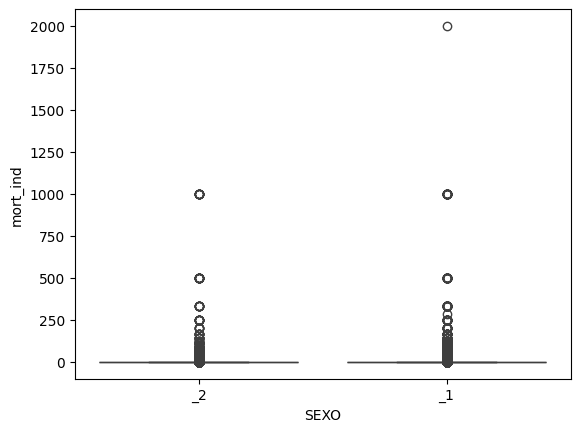

In [ ]:
### Exemplo Completo para Análise de Catetorias
df = dobr
var_cat = 'SEXO'
valor = 'mort_ind'

# Análise exploratória
print(df.groupby(var_cat)[valor].describe())

# Visualização
sns.boxplot(x=var_cat, y=valor, data=df)

# Teste ANOVA
from scipy import stats
grupos = dobr.groupby(var_cat)[valor].apply(list)
stats.f_oneway(*grupos)

In [ ]:
# Calcular ANOVA
stats.f_oneway(valores_categoria1, valores_categoria2, ...)

In [218]:
# Agrupar por UF e calcular a média das variáveis numéricas
uf_means = dobr.groupby('UF')['mort_ind'].mean()

# Exibir as médias calculadas
print(uf_means)

UF
AC    0.465878
AL    1.128169
AM    1.014083
AP    0.961956
BA         inf
CE         inf
DF    0.015249
ES    0.402856
GO    0.984023
MA         inf
MG         inf
MS    0.701599
MT    1.772923
PA    0.705199
PB    1.375251
PE         inf
PI         inf
PR    0.707167
RJ    0.169224
RN         inf
RO    0.706810
RR    0.297789
RS         inf
SC         inf
SE    0.446625
SP    0.327713
TO         inf
Name: mort_ind, dtype: float64


In [164]:
#Ajustar um tamanho para o gráfico (1000x1000)
plt.figure(figsize=(10, 10))

#Matriz de correlação
dataplot = sns.heatmap(dobr.corr(),
                       annot=True,
                       fmt='.1f') #annot são anotações e fmt a formatação dos valores

ValueError: could not convert string to float: 'V629'

<Figure size 1000x1000 with 0 Axes>

#### Carregar arquivos concatenados como dataframe

# Etapa 3 - Aplicação de Modelo do HEAT ao Bloco

# Etapa 4 - Reunião de alinhamento - ajustes

# Etapa 5 - Preparação para publicação de resultados